In [9]:
import numpy as np
import pandas as pdz
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg19 import VGG19,preprocess_input , decode_predictions


In [10]:
dir="train"
fname=os.listdir(dir)
print(fname)

['Parasite', 'Uninfected']


In [3]:
from sklearn import metrics

In [4]:
train_datagen=ImageDataGenerator(zoom_range= 0.5,shear_range=0.3,horizontal_flip= True,preprocessing_function = preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)


In [5]:
train = train_datagen.flow_from_directory(directory= dir,target_size=(256,256),batch_size=32)
val = val_datagen.flow_from_directory(directory= dir,target_size=(256,256),batch_size=32)

Found 368 images belonging to 2 classes.
Found 368 images belonging to 2 classes.


In [6]:
t_img , label =train.next()

In [7]:
#base_model generation
base_model=VGG19(input_shape=(256,256,3), include_top= False)

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
base_model.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [10]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19,preprocess_input , decode_predictions

In [11]:
X= Flatten()(base_model.output)

X= Dense(units= len(fname),activation= 'softmax')(X)

model= Model(base_model.input,X)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [13]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
#early stopping
es = EarlyStopping(monitor = 'val_accuracy',min_delta=0.01,patience=3,verbose=1)
#model check point
mc = ModelCheckpoint(filepath="best_mmodel.h5",monitor='val_accuracy',min_delta= 0.01,patience=3,verbose=1,save_best_only=True)

cb=[es,mc]

In [14]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19,preprocess_input , decode_predictions

In [15]:
model.compile(optimizer= 'adam',loss= keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [25]:
his = model.fit(train ,steps_per_epoch= len(train),epochs = 5,verbose= 1,callbacks= cb,validation_data=val ,validation_steps = len(val))


Epoch 1/5
12/12 [==============================] - 122s 10s/step - loss: 5.4387 - accuracy: 0.6658 - val_loss: 3.1347 - val_accuracy: 0.8641

Epoch 00001: val_accuracy did not improve from 0.95652
Epoch 2/5
12/12 [==============================] - 122s 11s/step - loss: 1.6994 - accuracy: 0.8614 - val_loss: 1.8605 - val_accuracy: 0.9375

Epoch 00002: val_accuracy did not improve from 0.95652
Epoch 3/5
12/12 [==============================] - 122s 11s/step - loss: 0.9455 - accuracy: 0.9239 - val_loss: 1.2937 - val_accuracy: 0.8995

Epoch 00003: val_accuracy did not improve from 0.95652
Epoch 4/5
12/12 [==============================] - 126s 11s/step - loss: 0.7054 - accuracy: 0.9293 - val_loss: 2.0201 - val_accuracy: 0.8234

Epoch 00004: val_accuracy did not improve from 0.95652
Epoch 5/5
12/12 [==============================] - 123s 11s/step - loss: 0.4811 - accuracy: 0.9565 - val_loss: 0.3093 - val_accuracy: 0.9674

Epoch 00005: val_accuracy improved from 0.95652 to 0.96739, saving mod

In [19]:
test=ImageDataGenerator(rescale=1/255)

In [20]:
test_dataset=test.flow_from_directory("test",target_size=(200,200),batch_size=3)


Found 48 images belonging to 2 classes.


In [21]:
X= Flatten()(base_model.output)

X= Dense(units= len(fname),activation= 'softmax')(X)

model1= Model(base_model.input,X)

In [22]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [23]:
model1.compile(optimizer= 'adam',loss= keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [24]:
his1 = model1.fit(train ,steps_per_epoch= len(train),epochs = 5,verbose= 1,callbacks= cb,validation_data=val ,validation_steps = len(val))


Epoch 1/5
12/12 [==============================] - 124s 11s/step - loss: 8.0693 - accuracy: 0.5353 - val_loss: 4.8588 - val_accuracy: 0.6984

Epoch 00001: val_accuracy improved from -inf to 0.69837, saving model to best_mmodel.h5
Epoch 2/5
12/12 [==============================] - 128s 11s/step - loss: 2.1243 - accuracy: 0.8261 - val_loss: 0.7486 - val_accuracy: 0.9266

Epoch 00002: val_accuracy improved from 0.69837 to 0.92663, saving model to best_mmodel.h5
Epoch 3/5
12/12 [==============================] - 128s 11s/step - loss: 0.8811 - accuracy: 0.9049 - val_loss: 0.4980 - val_accuracy: 0.9457

Epoch 00003: val_accuracy improved from 0.92663 to 0.94565, saving model to best_mmodel.h5
Epoch 4/5
12/12 [==============================] - 127s 11s/step - loss: 0.8304 - accuracy: 0.9293 - val_loss: 0.5438 - val_accuracy: 0.9565

Epoch 00004: val_accuracy improved from 0.94565 to 0.95652, saving model to best_mmodel.h5
Epoch 5/5
12/12 [==============================] - 130s 11s/step - loss

In [2]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\priya\.conda\envs\5444\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\priya\\AppData\\Local\\Temp\\pip-install-nqaq5jv2\\sklearn_b335b2e67275456e8966bd66ad8767aa\\setup.py'"'"'; __file__='"'"'C:\\Users\\priya\\AppData\\Local\\Temp\\pip-install-nqaq5jv2\\sklearn_b335b2e67275456e8966bd66ad8767aa\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\priya\AppData\Local\Temp\pip-pip-egg-info-i8y2x42j'
       cwd: C:\Users\priya\AppData\Local\Temp\pip-install-nqaq5jv2\sklearn_b335b2e67275456e8966bd66ad8767aa\
  Complete output (7 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>


  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9db50a98e1807533e8728317f154874983b9dd1192faf31b8c326bed4d97c69d
  Stored in directory: c:\users\priya\appdata\local\pip\cache\wheels\a8\20\b1\0b08c6071caf725f6b3f48c30faec4a855bcae02df1e61ed6c
Successfully built sklearn



    File "C:\Users\priya\AppData\Local\Temp\pip-install-nqaq5jv2\sklearn_b335b2e67275456e8966bd66ad8767aa\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\priya\.conda\envs\5444\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  ----------------------------------------


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
from sklearn.svm import SVC


In [7]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import os


In [12]:
classes={'Parasite':0, 'Uninfected':1}
X=[]
Y=[]
for cls in classes:
    pth="C:/Users/priya/project/train/"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

X=np.array(X)
Y=np.array(Y)

X_updated= X.reshape(len(X), -1)

xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, test_size=.20)

xtrain= xtrain/255
xtest= xtest/255

clf = SVC(random_state=0, tol=1e-5)
clf.fit(xtrain, ytrain)
predicted = clf.predict(xtest)
print(accuracy_score(ytest, clf.predict(xtest)))


0.7027027027027027


In [19]:
xtrain.shape

(294, 40000)

In [20]:
xtest.shape

(74, 40000)

In [21]:
clf.compile(loss= keras.losses.binary_crossentropy, metrics = ['accuracy'])

AttributeError: 'SVC' object has no attribute 'compile'

In [13]:
print(X[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
confusion_matrix=confusion_matrix(ytest, clf.predict(xtest))

In [16]:
print(confusion_matrix)

[[29 13]
 [ 7 25]]


In [17]:
from sklearn import metrics

In [18]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

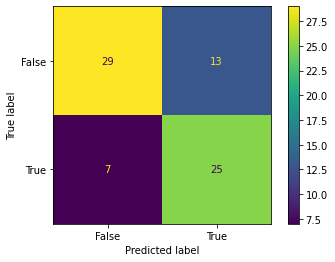

In [19]:
cm_display.plot()
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [14]:
print(precision_score(ytest, clf.predict(xtest)))

0.6153846153846154


In [16]:
print(recall_score(ytest, clf.predict(xtest)))

0.7741935483870968


In [17]:
print(f1_score(ytest, clf.predict(xtest)))

0.6857142857142857


In [18]:

model.save("best_mmodel.h5")


In [19]:
from keras.applications.vgg16 import VGG16,preprocess_input , decode_predictions

In [20]:
#base_model generation
base_model=VGG16(input_shape=(256,256,3), include_top= False)

58900480/58889256 [==============================] - 17s 0us/step


In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
base_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [24]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16,preprocess_input , decode_predictions

In [25]:
model.compile(optimizer= 'adam',loss= keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [27]:
his = model.fit(train ,steps_per_epoch= len(train),epochs = 5,verbose= 1,callbacks= cb,validation_data=val ,validation_steps = len(val))


Epoch 1/5
12/12 [==============================] - 120s 10s/step - loss: 0.2870 - accuracy: 0.9701 - val_loss: 0.1303 - val_accuracy: 0.9918

Epoch 00001: val_accuracy did not improve from 0.99185
Epoch 2/5
12/12 [==============================] - 118s 10s/step - loss: 0.2688 - accuracy: 0.9755 - val_loss: 0.1264 - val_accuracy: 0.9946

Epoch 00002: val_accuracy improved from 0.99185 to 0.99457, saving model to best_mmodel.h5
Epoch 3/5
12/12 [==============================] - 118s 10s/step - loss: 0.5304 - accuracy: 0.9565 - val_loss: 0.0880 - val_accuracy: 0.9946

Epoch 00003: val_accuracy did not improve from 0.99457
Epoch 4/5
12/12 [==============================] - 330s 30s/step - loss: 0.3053 - accuracy: 0.9728 - val_loss: 0.2615 - val_accuracy: 0.9783

Epoch 00004: val_accuracy did not improve from 0.99457
Epoch 00004: early stopping


In [32]:
import numpy as np
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import cv2

from keras.models import load_model

model = load_model('best_mmodel.h5')

img = load_img("p6.png", target_size=(256, 256))
i = img_to_array(img)
im = preprocess_input(i)
img = np.expand_dims(im,axis=0)
pred = np.argmax(model.predict(img))
print(pred)


0


In [37]:
import numpy as np
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import cv2

from keras.models import load_model

model = load_model('best_mmodel.h5')

img = load_img("u7.png", target_size=(256, 256))
i = img_to_array(img)
im = preprocess_input(i)
img = np.expand_dims(im,axis=0)
pred = np.argmax(model.predict(img))
print(pred)


1


In [27]:
for k in train.class_indices.keys():
    if train.class_indices[k]==pred:
        print(k)

Uninfected


In [38]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     